# Project Python for Data Science: Austo Automobile Data Analysis

## Context
Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

### Objective
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

-  Age: The age of the individual in years.
-  Gender: The gender of the individual, categorized as male or female.
-  Profession: The occupation or profession of the individual.
-  Marital_status: The marital status of the individual, such as married &, single
-  Education: The educational qualification of the individual Graduate and Post Graduate
-  No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
-  Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
-  House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
-  Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
-  Salary: The individual's salary or income.
-  Partner_salary: The salary or income of the individual's partner, if applicable.
-  Total_salary: The total combined salary of the individual and their partner (if applicable).
-  Price: The price of a product or service.
-  Make: The type of automobile

## Data Overview

### Importing the required libraries

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [161]:
data=pd.read_csv('/Users/ruthwik/Desktop/Great lakes/Projects/project 1/austo_automobile.csv')
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


#### It shows up first 5 records of the data

### Question 1: How many rows and columns are present in the data?

In [162]:
data.shape

(1581, 14)

#### There are 1581 rows and 14 columns in the dataset

### Question 2: What are the datatypes of the different columns in the dataset?

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


### Question 3: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [164]:
data.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


### Question 4: Check for and treat (if needed) data irregularities

In [166]:
data['Gender'].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [167]:
data['Gender']= data['Gender'].replace(['Femal','Femle'],'Female')
data['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

### Question 5: Are there any missing values in the data? If yes, treat them using an appropriate method.

In [168]:
data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [169]:
G= data['Gender'].mode()[0]
G 

'Male'

In [170]:
data['Gender']=data['Gender'].fillna(value=G)

In [172]:
data[data['Partner_salary'].isnull()]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,NaN,72100,60000,SUV
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100,NaN,52100,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,Yes,Yes,No,39700,NaN,39700,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000,NaN,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback


In [173]:
data.loc[(data['Partner_working']=='No')&(data['Partner_salary'].isnull()),'Partner_salary']=0

In [174]:
data.loc[(data['Partner_working']=='Yes')&(data['Partner_salary'].isna()),'Partner_salary']=data['Total_salary']-data['Salary']

In [175]:
data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

## Univariate Analysis

<Axes: xlabel='Age', ylabel='Count'>

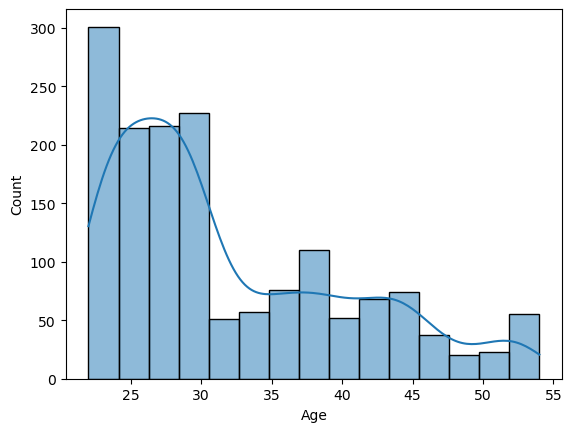

In [196]:
sns.histplot(data['Age'],kde=True)

#### Data is right skewed

<Axes: xlabel='Age'>

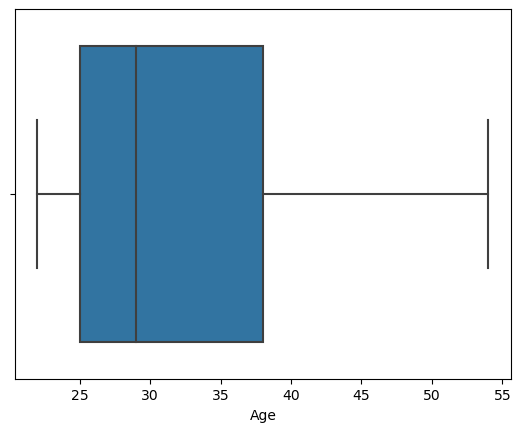

In [546]:
sns.boxplot(data, x='Age')

There are no outliers present in the data

<Axes: xlabel='Total_salary', ylabel='Count'>

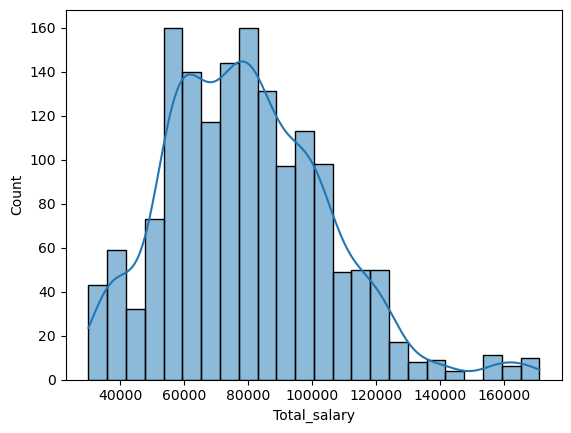

In [550]:
sns.histplot(data['Total_salary'],kde=True)

<Axes: xlabel='Total_salary'>

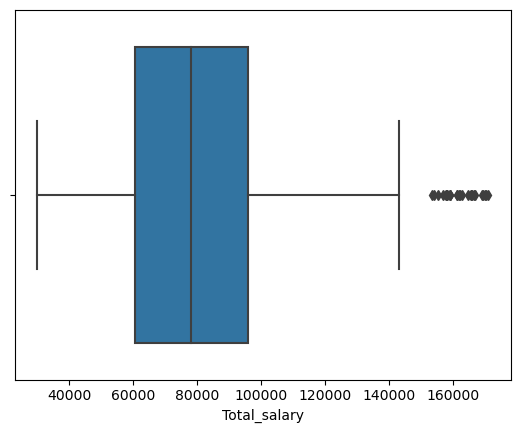

In [547]:
sns.boxplot(data, x='Total_salary')

Data is right skewed.

In [597]:
Total_salary_mean =data['Total_salary'].mean()
print(f"Mean of Total salary = {Total_salary_mean}")

Mean of Total salary = 79625.99620493359


<Axes: xlabel='Salary', ylabel='Count'>

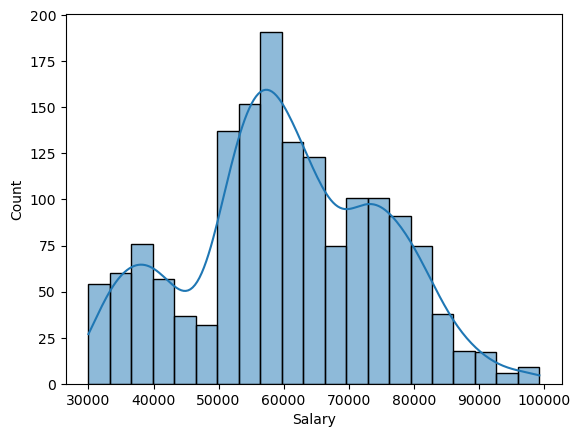

In [551]:
sns.histplot(data['Salary'],kde=True)

<Axes: xlabel='Salary'>

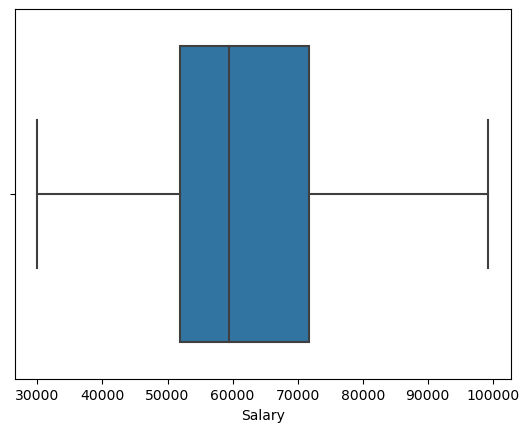

In [552]:
sns.boxplot(data, x='Salary')

<Axes: xlabel='Price', ylabel='Count'>

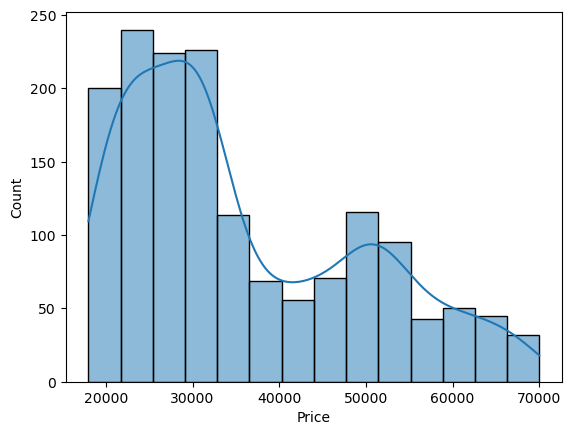

In [553]:
sns.histplot(data['Price'],kde=True)

In [598]:
Price_median = data['Price'].median()
print(f"Median of price = {Price_median}")

Median of price = 31000.0


<Axes: xlabel='Price'>

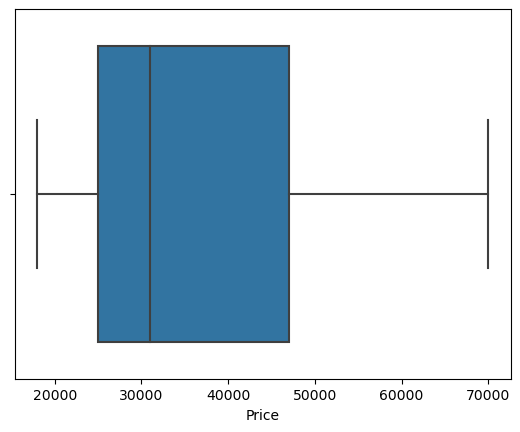

In [554]:
sns.boxplot(data, x='Price')

In [568]:
data.skew()

/var/folders/vm/tzcnkzf15f90ll2ywxlr43nr0000gn/T/ipykernel_18017/1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Age                 0.893087
No_of_Dependents   -0.129808
Salary             -0.011571
Partner_salary      0.441069
Total_salary        0.609706
Price               0.740874
dtype: float64

<Axes: xlabel='Make', ylabel='count'>

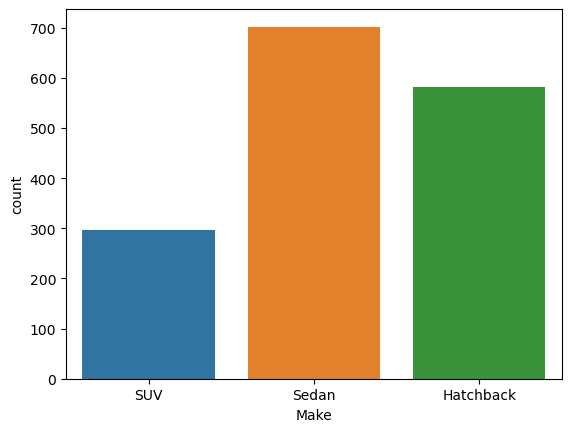

In [496]:
sns.countplot(data, x='Make')

Sedans have the highest sales.

## Bivariate Analysis

<Axes: xlabel='Make', ylabel='Price'>

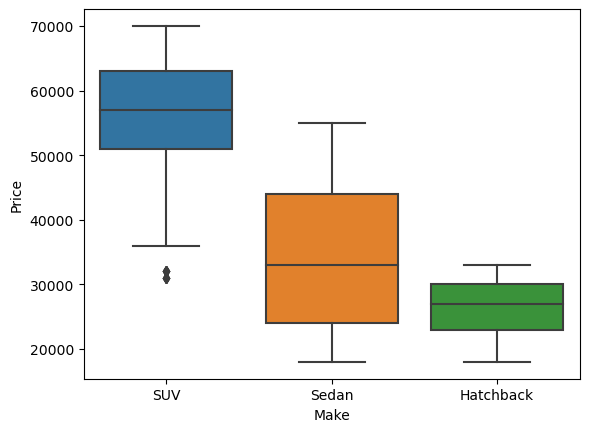

In [370]:
sns.boxplot(data, x='Make', y='Price')

In [594]:
data.loc[data['Make']=='SUV','Price'].median()

57000.0

SUVs are the highest priced automobiles

median = 57000

<Axes: xlabel='Make', ylabel='count'>

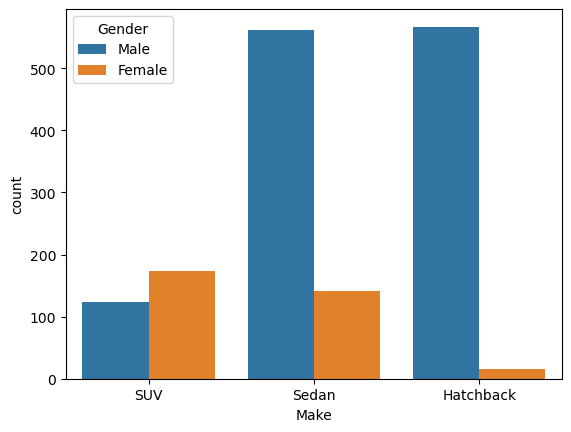

In [486]:
sns.countplot(data, x ='Make',hue='Gender')

Male prefer sedan and hatchback more than SUVs

<Axes: xlabel='Profession', ylabel='Price'>

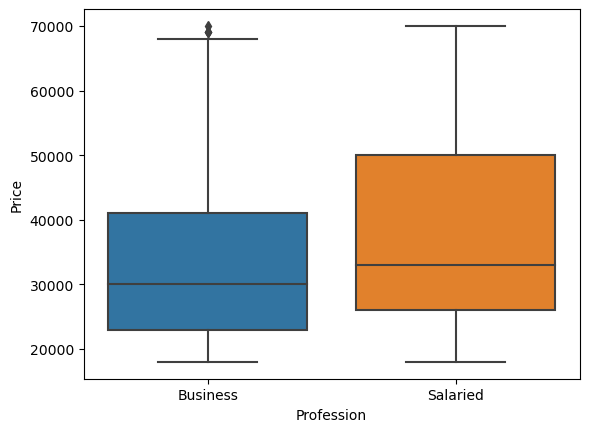

In [216]:
sns.boxplot(data, x ='Profession',y='Price')

<Axes: xlabel='Gender', ylabel='Price'>

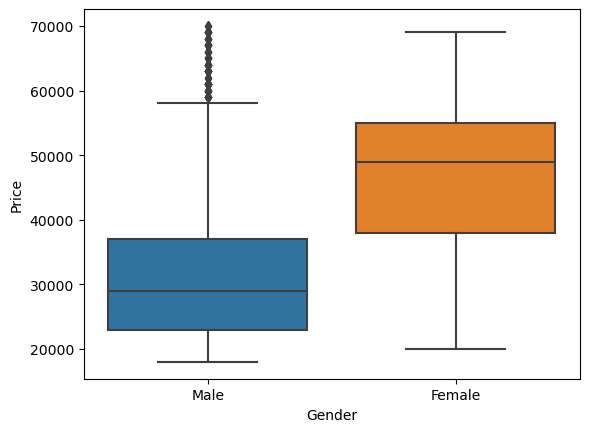

In [212]:
sns.boxplot(data,x='Gender',y='Price')

<Axes: xlabel='Age', ylabel='Salary'>

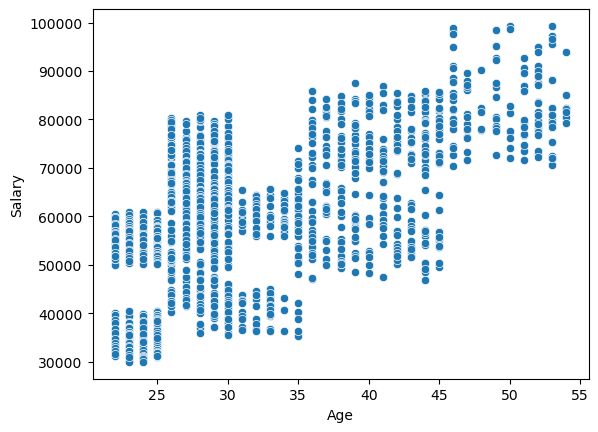

In [533]:
sns.scatterplot(data, x='Age',y='Salary')

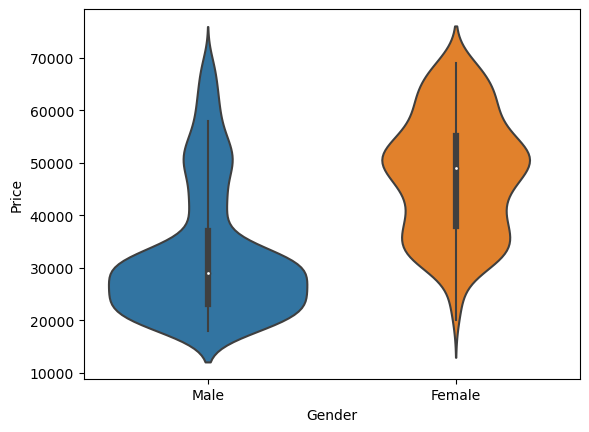

In [494]:
sns.violinplot(data, x='Gender',y='Price');

<Axes: xlabel='Make', ylabel='count'>

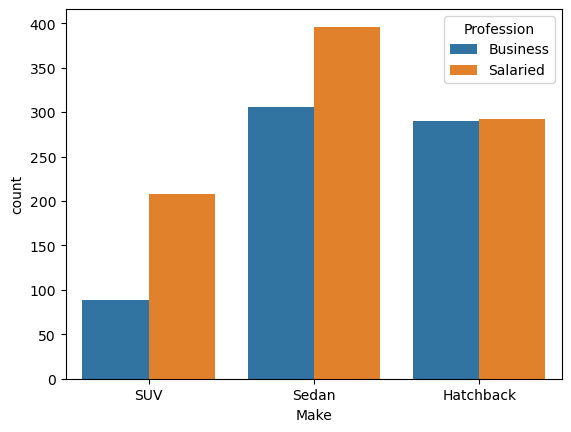

In [239]:
sns.countplot(data, x='Make', hue='Profession')

<Axes: xlabel='Total_salary', ylabel='Price'>

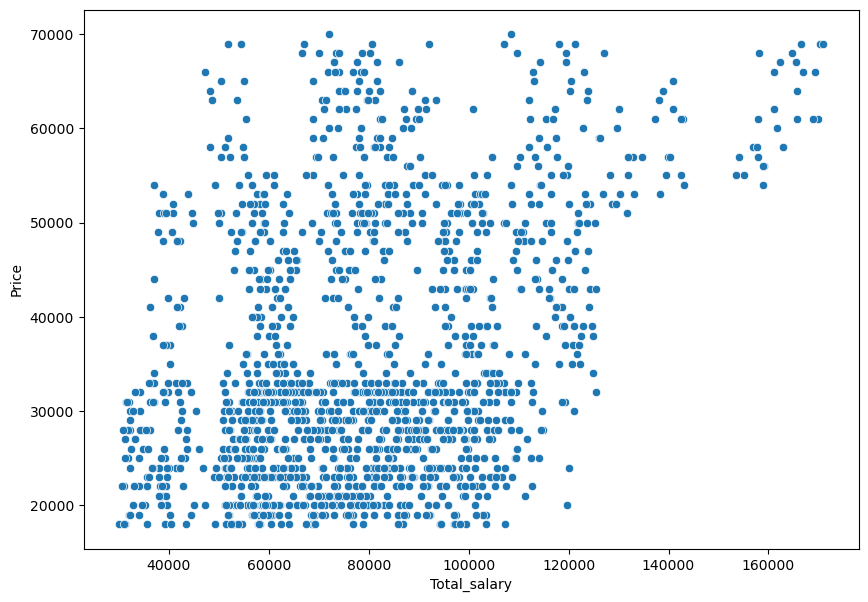

In [537]:
plt.figure(figsize=(10,7))
plt.xlim()
sns.scatterplot(data, x='Total_salary',y='Price')

<Axes: xlabel='Salary', ylabel='Price'>

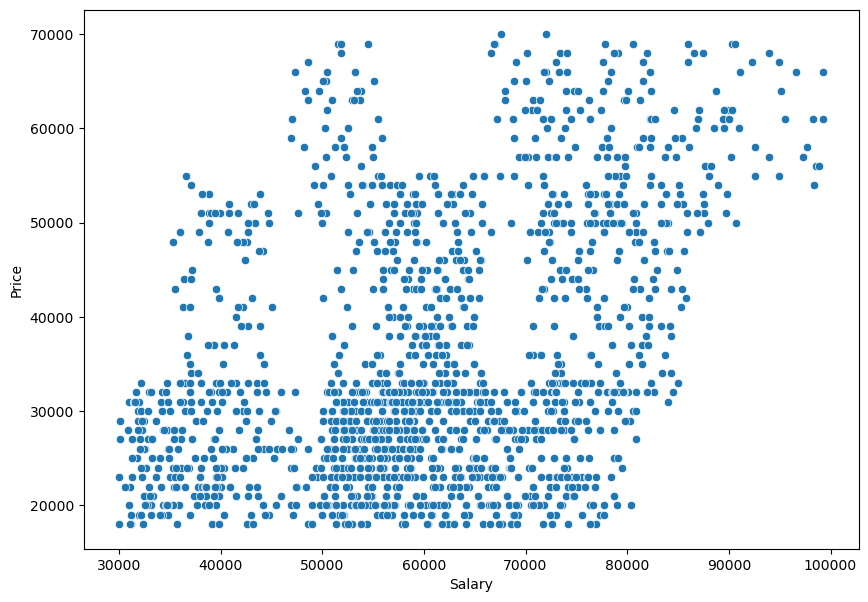

In [539]:
plt.figure(figsize=(10,7))
sns.scatterplot(data, x='Salary',y='Price')

/var/folders/vm/tzcnkzf15f90ll2ywxlr43nr0000gn/T/ipykernel_18017/2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

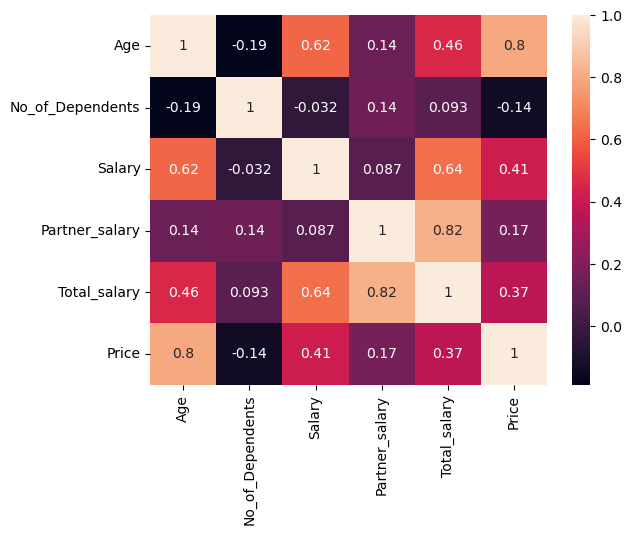

In [498]:
sns.heatmap(data.corr(),annot=True)

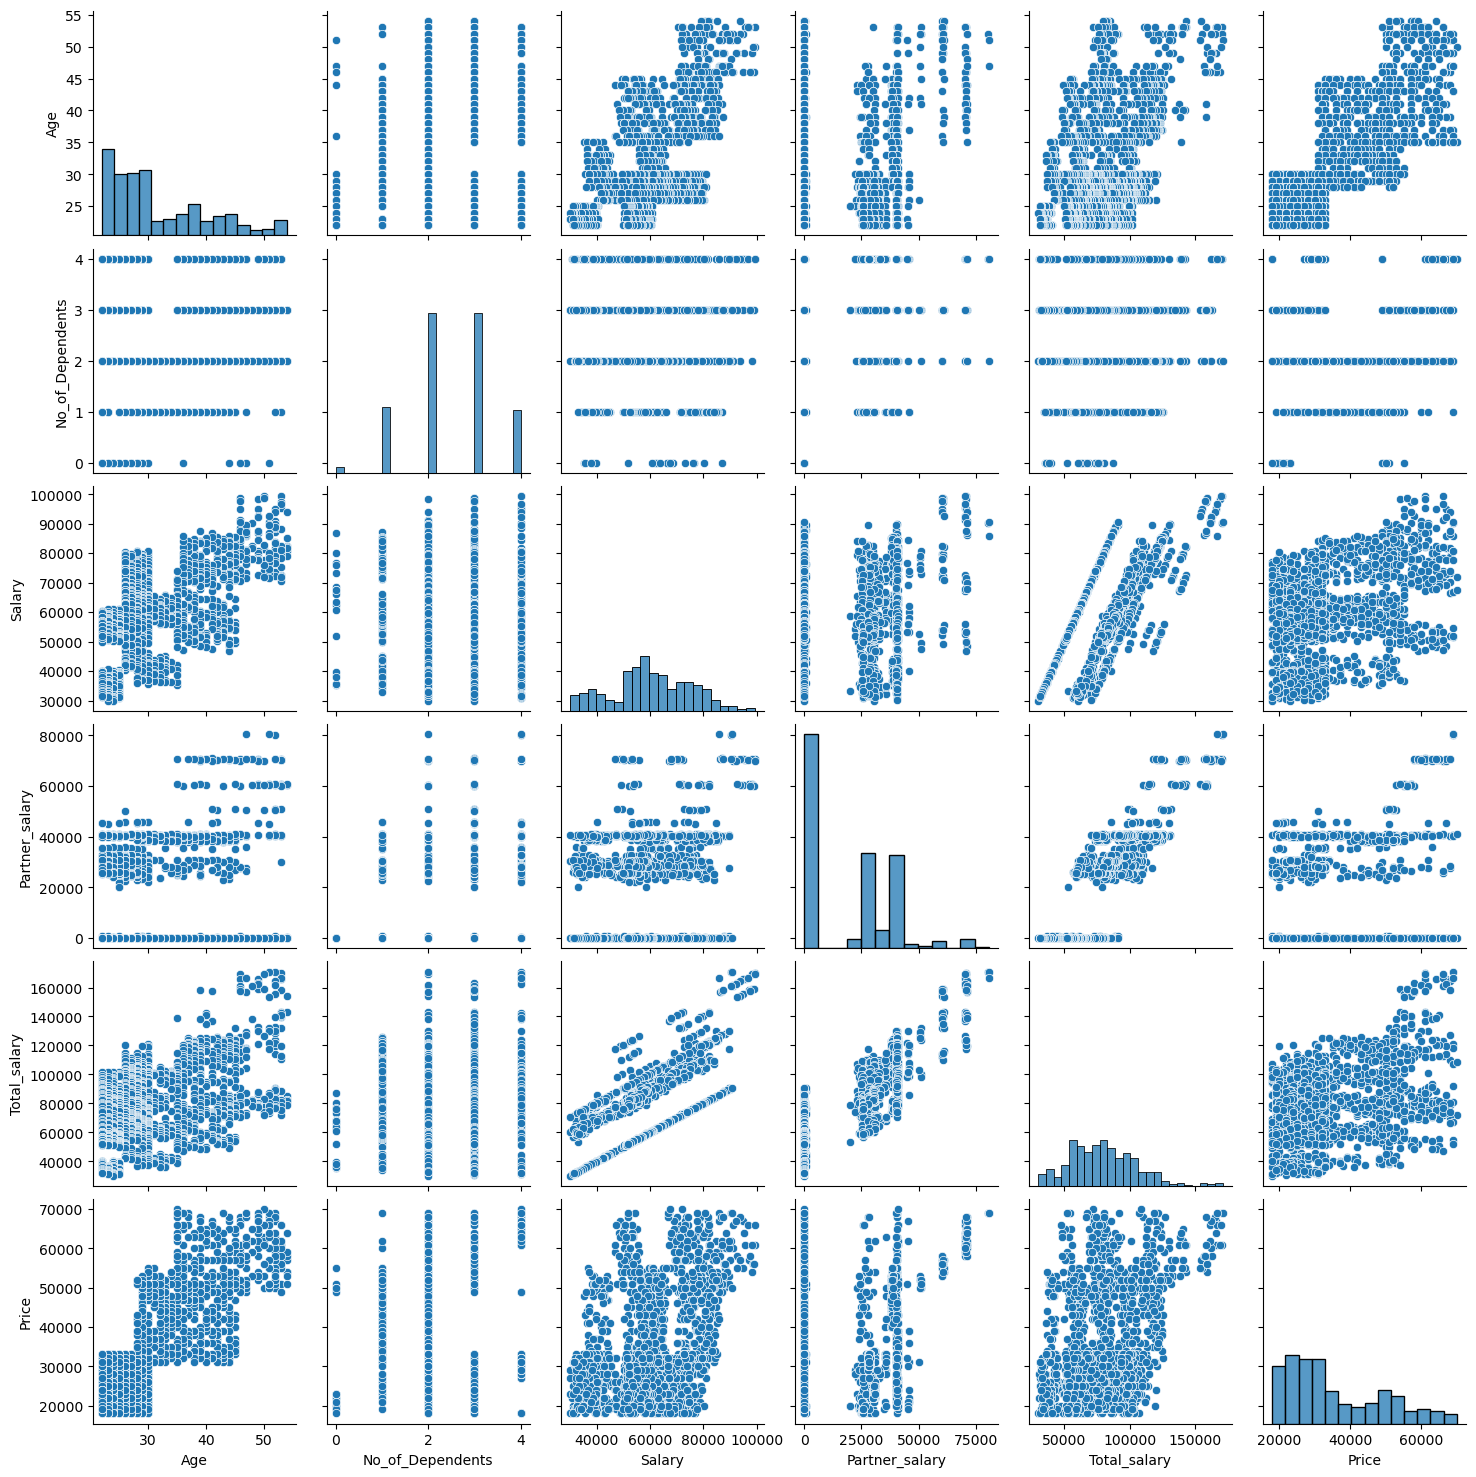

In [499]:
sns.pairplot(data)

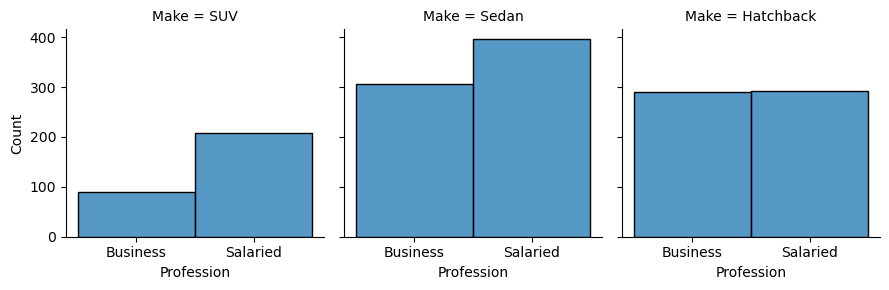

In [371]:
g=sns.FacetGrid(data,col='Make')
g.map(sns.histplot,'Profession')

### Key questions

#### 1. Do men tend to prefer SUVs more compared to women?

In [346]:
data.groupby('Gender')['Make'].value_counts()

Gender  Make     
Female  SUV          173
        Sedan        141
        Hatchback     15
Male    Hatchback    567
        Sedan        561
        SUV          124
Name: Make, dtype: int64

#### No, actually women prefer SUVs more than men 

#### 2. What is the likelihood of a salaried person buying a Sedan?

In [349]:
data.groupby('Profession')['Make'].value_counts()

Profession  Make     
Business    Sedan        306
            Hatchback    290
            SUV           89
Salaried    Sedan        396
            Hatchback    292
            SUV          208
Name: Make, dtype: int64

In [573]:
total_salaried = data['Profession'][data['Profession']=='Salaried'].count()
print(f"Total salaried = {total_salaried}")

Total salaried = 896


In [574]:
salaried_sedan_purchases = data['Profession'][(data['Profession']=='Salaried')&(data['Make']=='Sedan')].count()
print(f"Total salaried sedan purchases$ = {salaried_sedan_purchases}")

Total salaried sedan purchases = 396


In [369]:
likelihood_salaried_sedan = salaried_sedan_purchases / total_salaried
print(f"The likelihood of a salaried person buying a Sedan is {likelihood_salaried_sedan:.2f}")

The likelihood of a salaried person buying a Sedan is 0.44


#### 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale? 

In [381]:
S=data.loc[(data['Gender']=='Male')&(data['Profession']=='Salaried')]
car_type = S['Make'].value_counts()
car_type

Sedan        305
Hatchback    277
SUV           90
Name: Make, dtype: int64

<Axes: xlabel='Make', ylabel='count'>

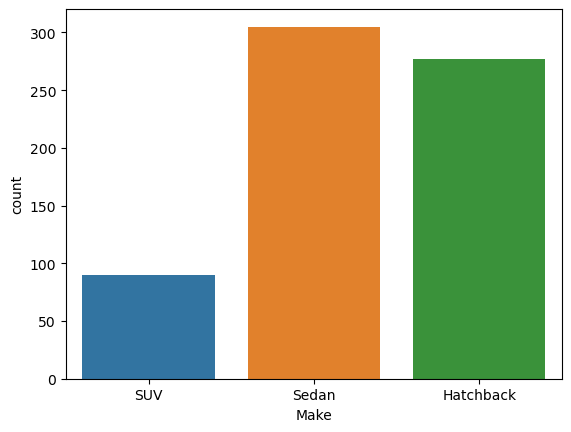

In [382]:
sns.countplot(S,x='Make')

#### The above data shows sedans has the highest sales then after hatchback among the salaried male.

#### 4. How does the amount spent on purchasing automobiles vary by gender?

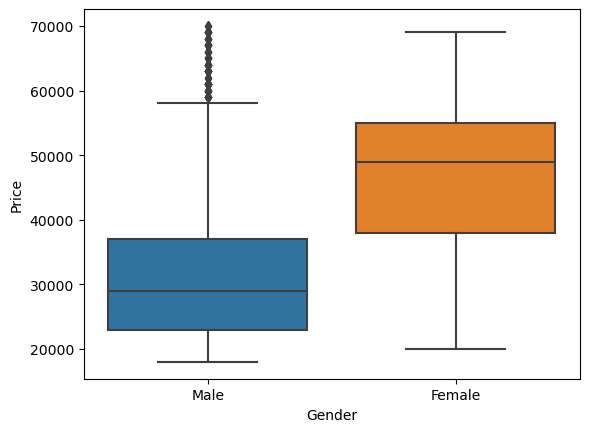

In [576]:
x=sns.boxplot(data,x='Gender',y='Price')

<Axes: xlabel='Gender', ylabel='Price'>

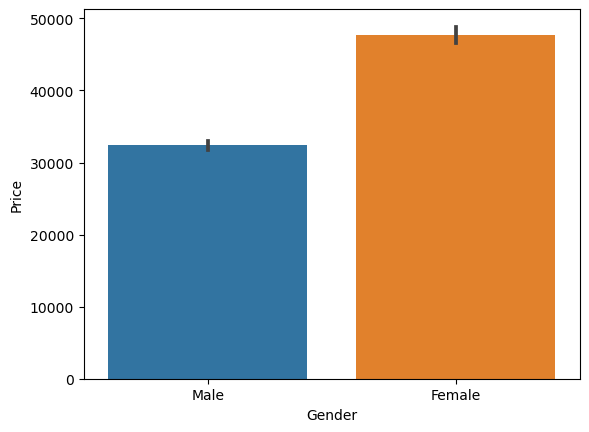

In [338]:
sns.barplot(data,x='Gender',y='Price')

There are outliers present in the data.
75% of men spend less than 25% of women on automobiles

In [589]:
data.loc[data['Gender']=='Female','Price'].mean()

47705.16717325228

In [590]:
data.loc[data['Gender']=='Male','Price'].mean()

32416.134185303516

#### 5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

In [593]:
P=data.loc[data['Personal_loan']=='Yes']
p1=P['Price'].sum()
print(f"Money spent on purchasing automobiles by individuals who took a personal loan = {p1}")

Money spent on purchasing automobiles by individuals who took a personal loan = 27290000


<Axes: xlabel='Price', ylabel='Count'>

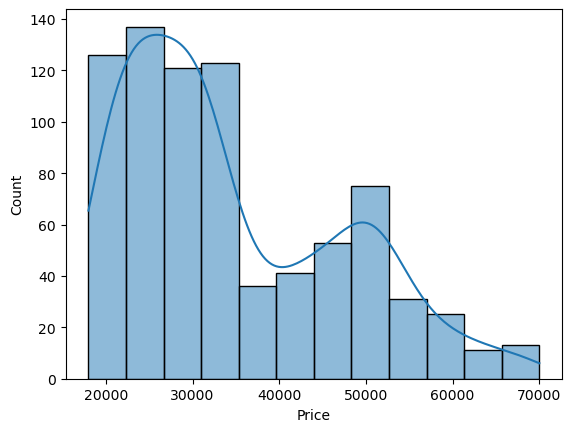

In [390]:
sns.histplot(P,x='Price',kde=True)

#### 6. How does having a working partner influence the purchase of higher-priced cars?

In [395]:
avg_price = data.groupby('Partner_working')['Price'].mean()
avg_price

Partner_working
No     36000.000000
Yes    35267.281106
Name: Price, dtype: float64

<Axes: xlabel='Partner_working', ylabel='Price'>

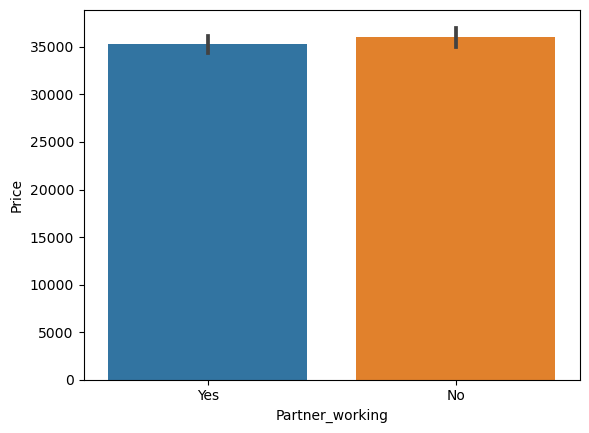

In [344]:
sns.barplot(data,x='Partner_working', y='Price')

The average expenditure on automobiles by people is almost same for the couple with partner working and couple with partner not working.

## Actionable Insights and Recommendations

In [605]:
data.loc[data['Age']>44,'Make'].value_counts()

SUV      154
Sedan     15
Name: Make, dtype: int64

In [606]:
data.loc[data['Age'].between(30,44),'Make'].value_counts()

Sedan        382
SUV          136
Hatchback     53
Name: Make, dtype: int64

In [607]:
data.loc[data['Age']<30,'Make'].value_counts()

Hatchback    529
Sedan        305
SUV            7
Name: Make, dtype: int64

#### People with age greater than 44 are preferring SUVs, with age between 30 to 44 are preferring for Sedans and rest below 30 age are preferring for Hatchbacks more because of their little cost.

In [608]:
data.loc[data['Total_salary']>126000,['Make']].value_counts()

Make
SUV     56
dtype: int64

#### People with total salary greater than 126000 are preferring for SUV

In [609]:
data.corr()

/var/folders/vm/tzcnkzf15f90ll2ywxlr43nr0000gn/T/ipykernel_18017/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.000000,-0.189614,0.616899,0.135702,0.458869,0.797831
No_of_Dependents,-0.189614,1.000000,-0.031746,0.144320,0.092890,-0.135839
Salary,0.616899,-0.031746,1.000000,0.087155,0.641560,0.409920
Partner_salary,0.135702,0.144320,0.087155,1.000000,0.820069,0.171875
Total_salary,0.458869,0.092890,0.641560,0.820069,1.000000,0.367823
Price,0.797831,-0.135839,0.409920,0.171875,0.367823,1.000000
